# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 


In [23]:
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Company_Data.csv')

In [16]:
data.head(10)
         
         
        

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [18]:
data.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

In [20]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [25]:
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company1 = encoder.fit_transform(data)

In [26]:
company_val = []
for value in data["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

company1["company_val"]= company_val

In [27]:
company1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
5,10.81,124,113,13,501,72,1,78,16,2,1,high
6,6.63,115,105,0,45,108,3,71,15,1,2,low
7,11.85,136,81,15,425,120,2,67,10,1,1,high
8,6.54,132,110,0,108,124,3,76,10,2,2,low
9,4.69,132,113,0,131,124,3,76,17,2,1,low


In [28]:
x = company1.drop(['company_val','Sales'], axis =1)
y = company1['company_val']

In [29]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [30]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: company_val, Length: 400, dtype: object

In [31]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [32]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
pred_test1 = model1.predict(x_test)

print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)

pred_train1 = model1.predict(x_train)

print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [34]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [36]:
pred_test2 = model2.predict(x_test)

print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)

pred_train2 = model2.predict(x_train)

print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

Test data Accuracy is: 65.0
Train data Accuracy is: 90.9375


In [38]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [39]:
pred_test3 = model3.predict(x_test)

print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)

pred_train3 = model3.predict(x_train)

print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 91.875


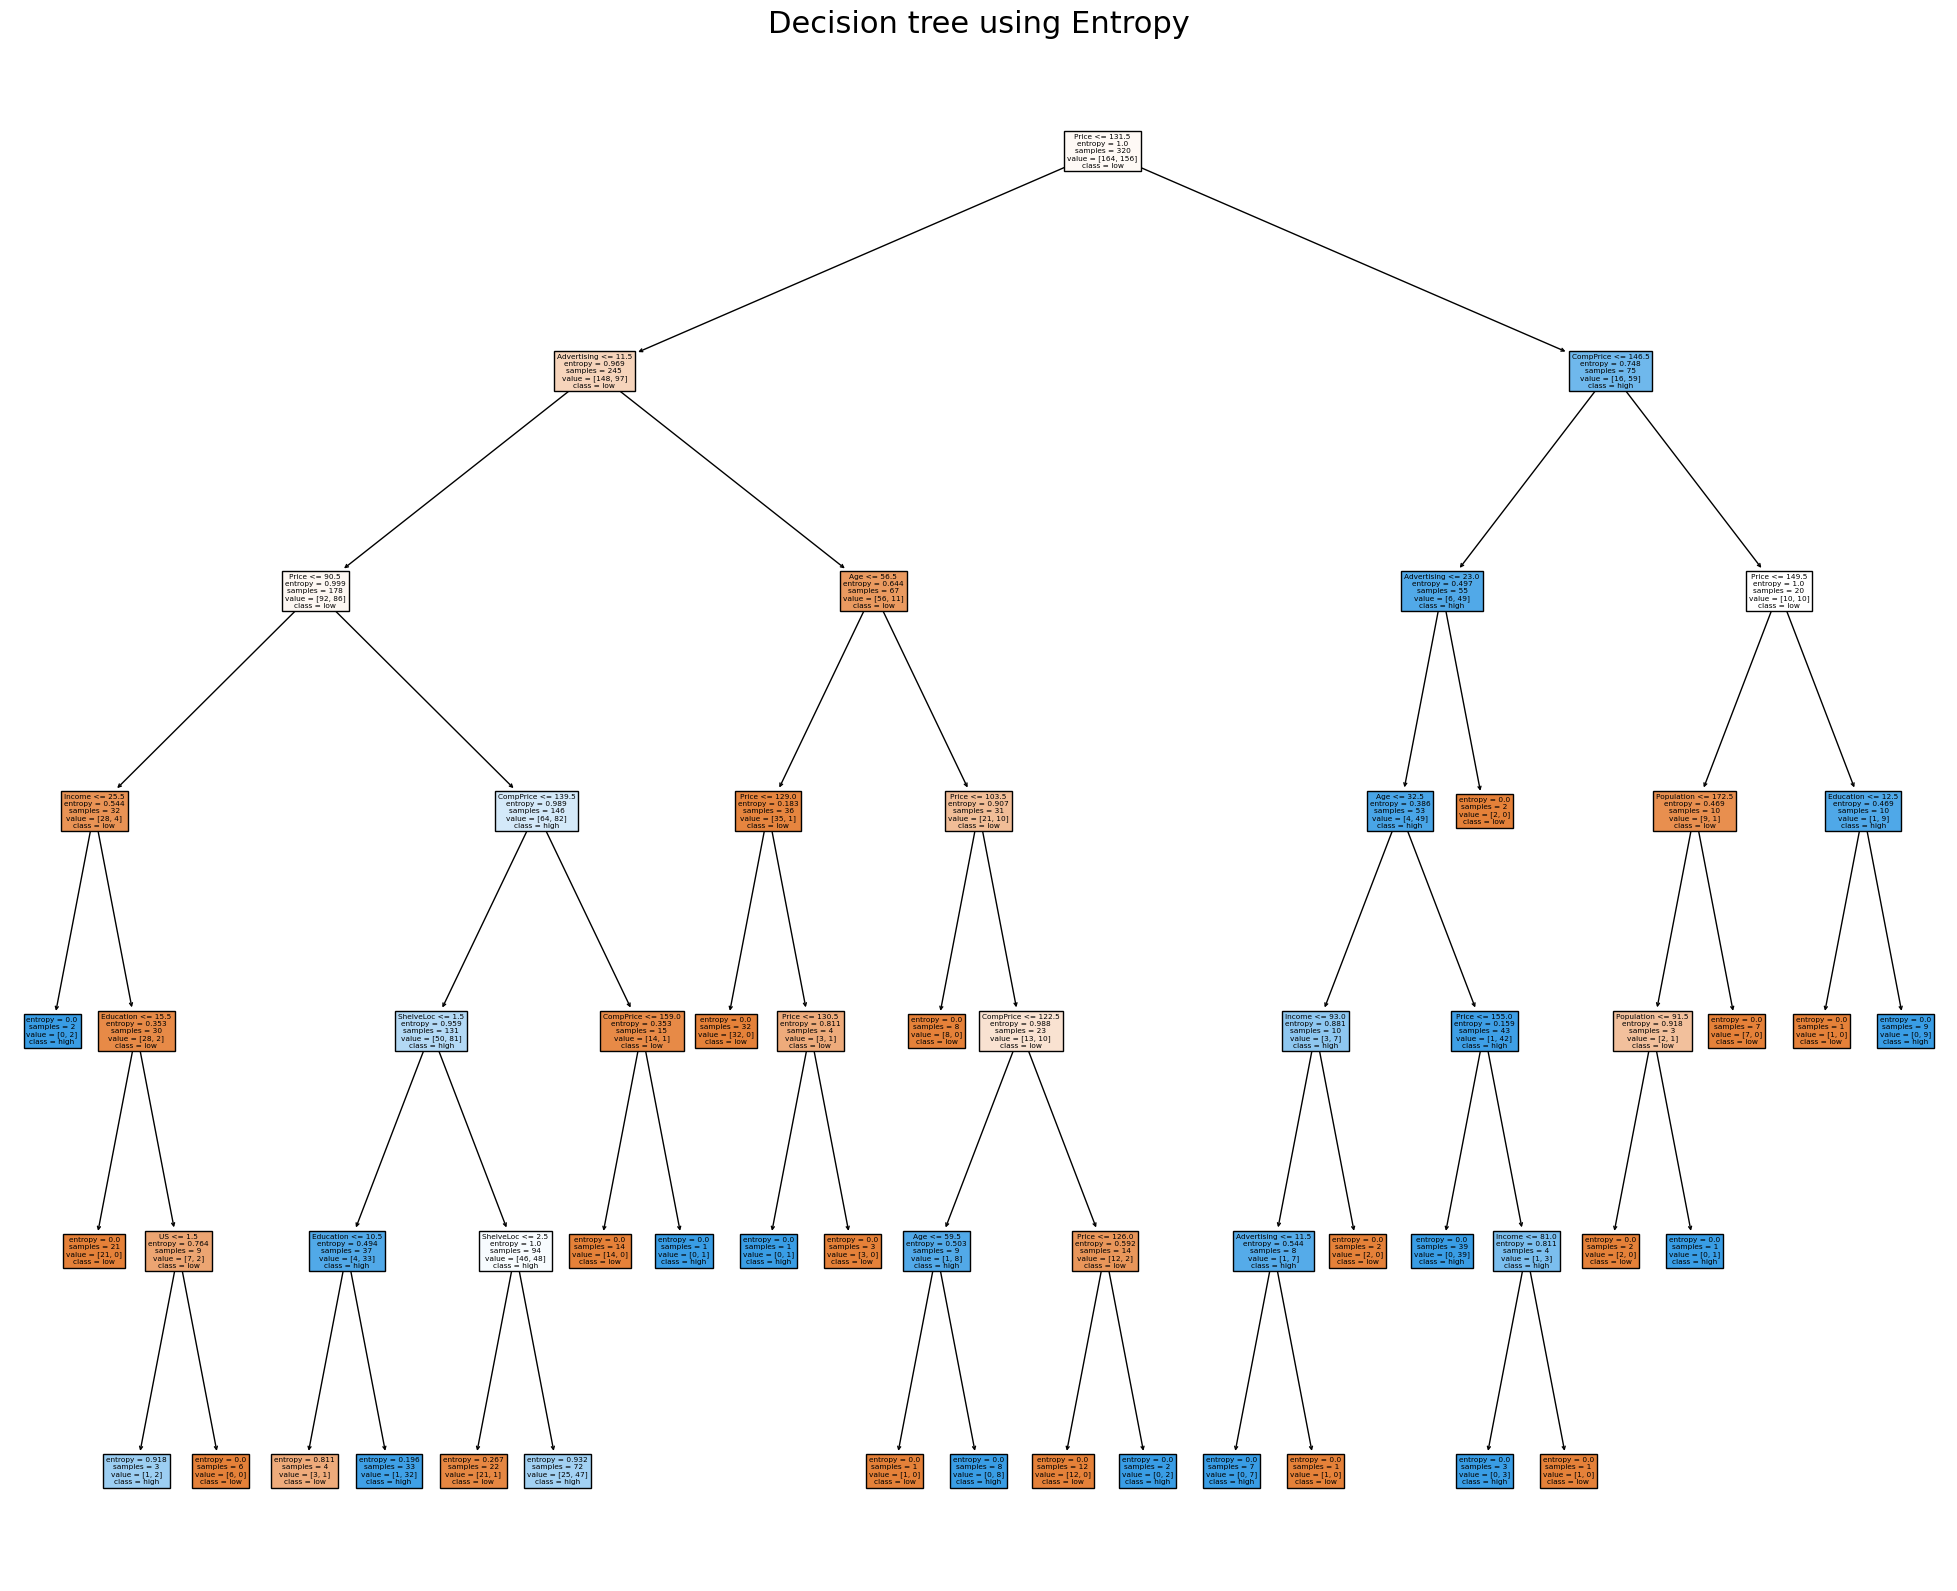

In [40]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

In [41]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
pred_testg1 = model_gini1.predict(x_test)

print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)

pred_traing1 = model_gini1.predict(x_train)

print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 73.75
Train data Accuracy is: 88.75


In [43]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [44]:
pred_testg2 = model_gini2.predict(x_test)

print('Test data Accuracy is:',np.mean(pred_testg2==y_test)*100)

pred_traing2 = model_gini2.predict(x_train)

print('Train data Accuracy is:',np.mean(pred_traing2==y_train)*100)

Test data Accuracy is: 70.0
Train data Accuracy is: 92.5


In [46]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [47]:
pred_testg3 = model_gini3.predict(x_test)

print('Test data Accuracy is:',np.mean(pred_testg3==y_test)*100)

pred_traing3 = model_gini3.predict(x_train)

print('Train data Accuracy is:',np.mean(pred_traing3==y_train)*100)

Test data Accuracy is: 65.0
Train data Accuracy is: 96.875


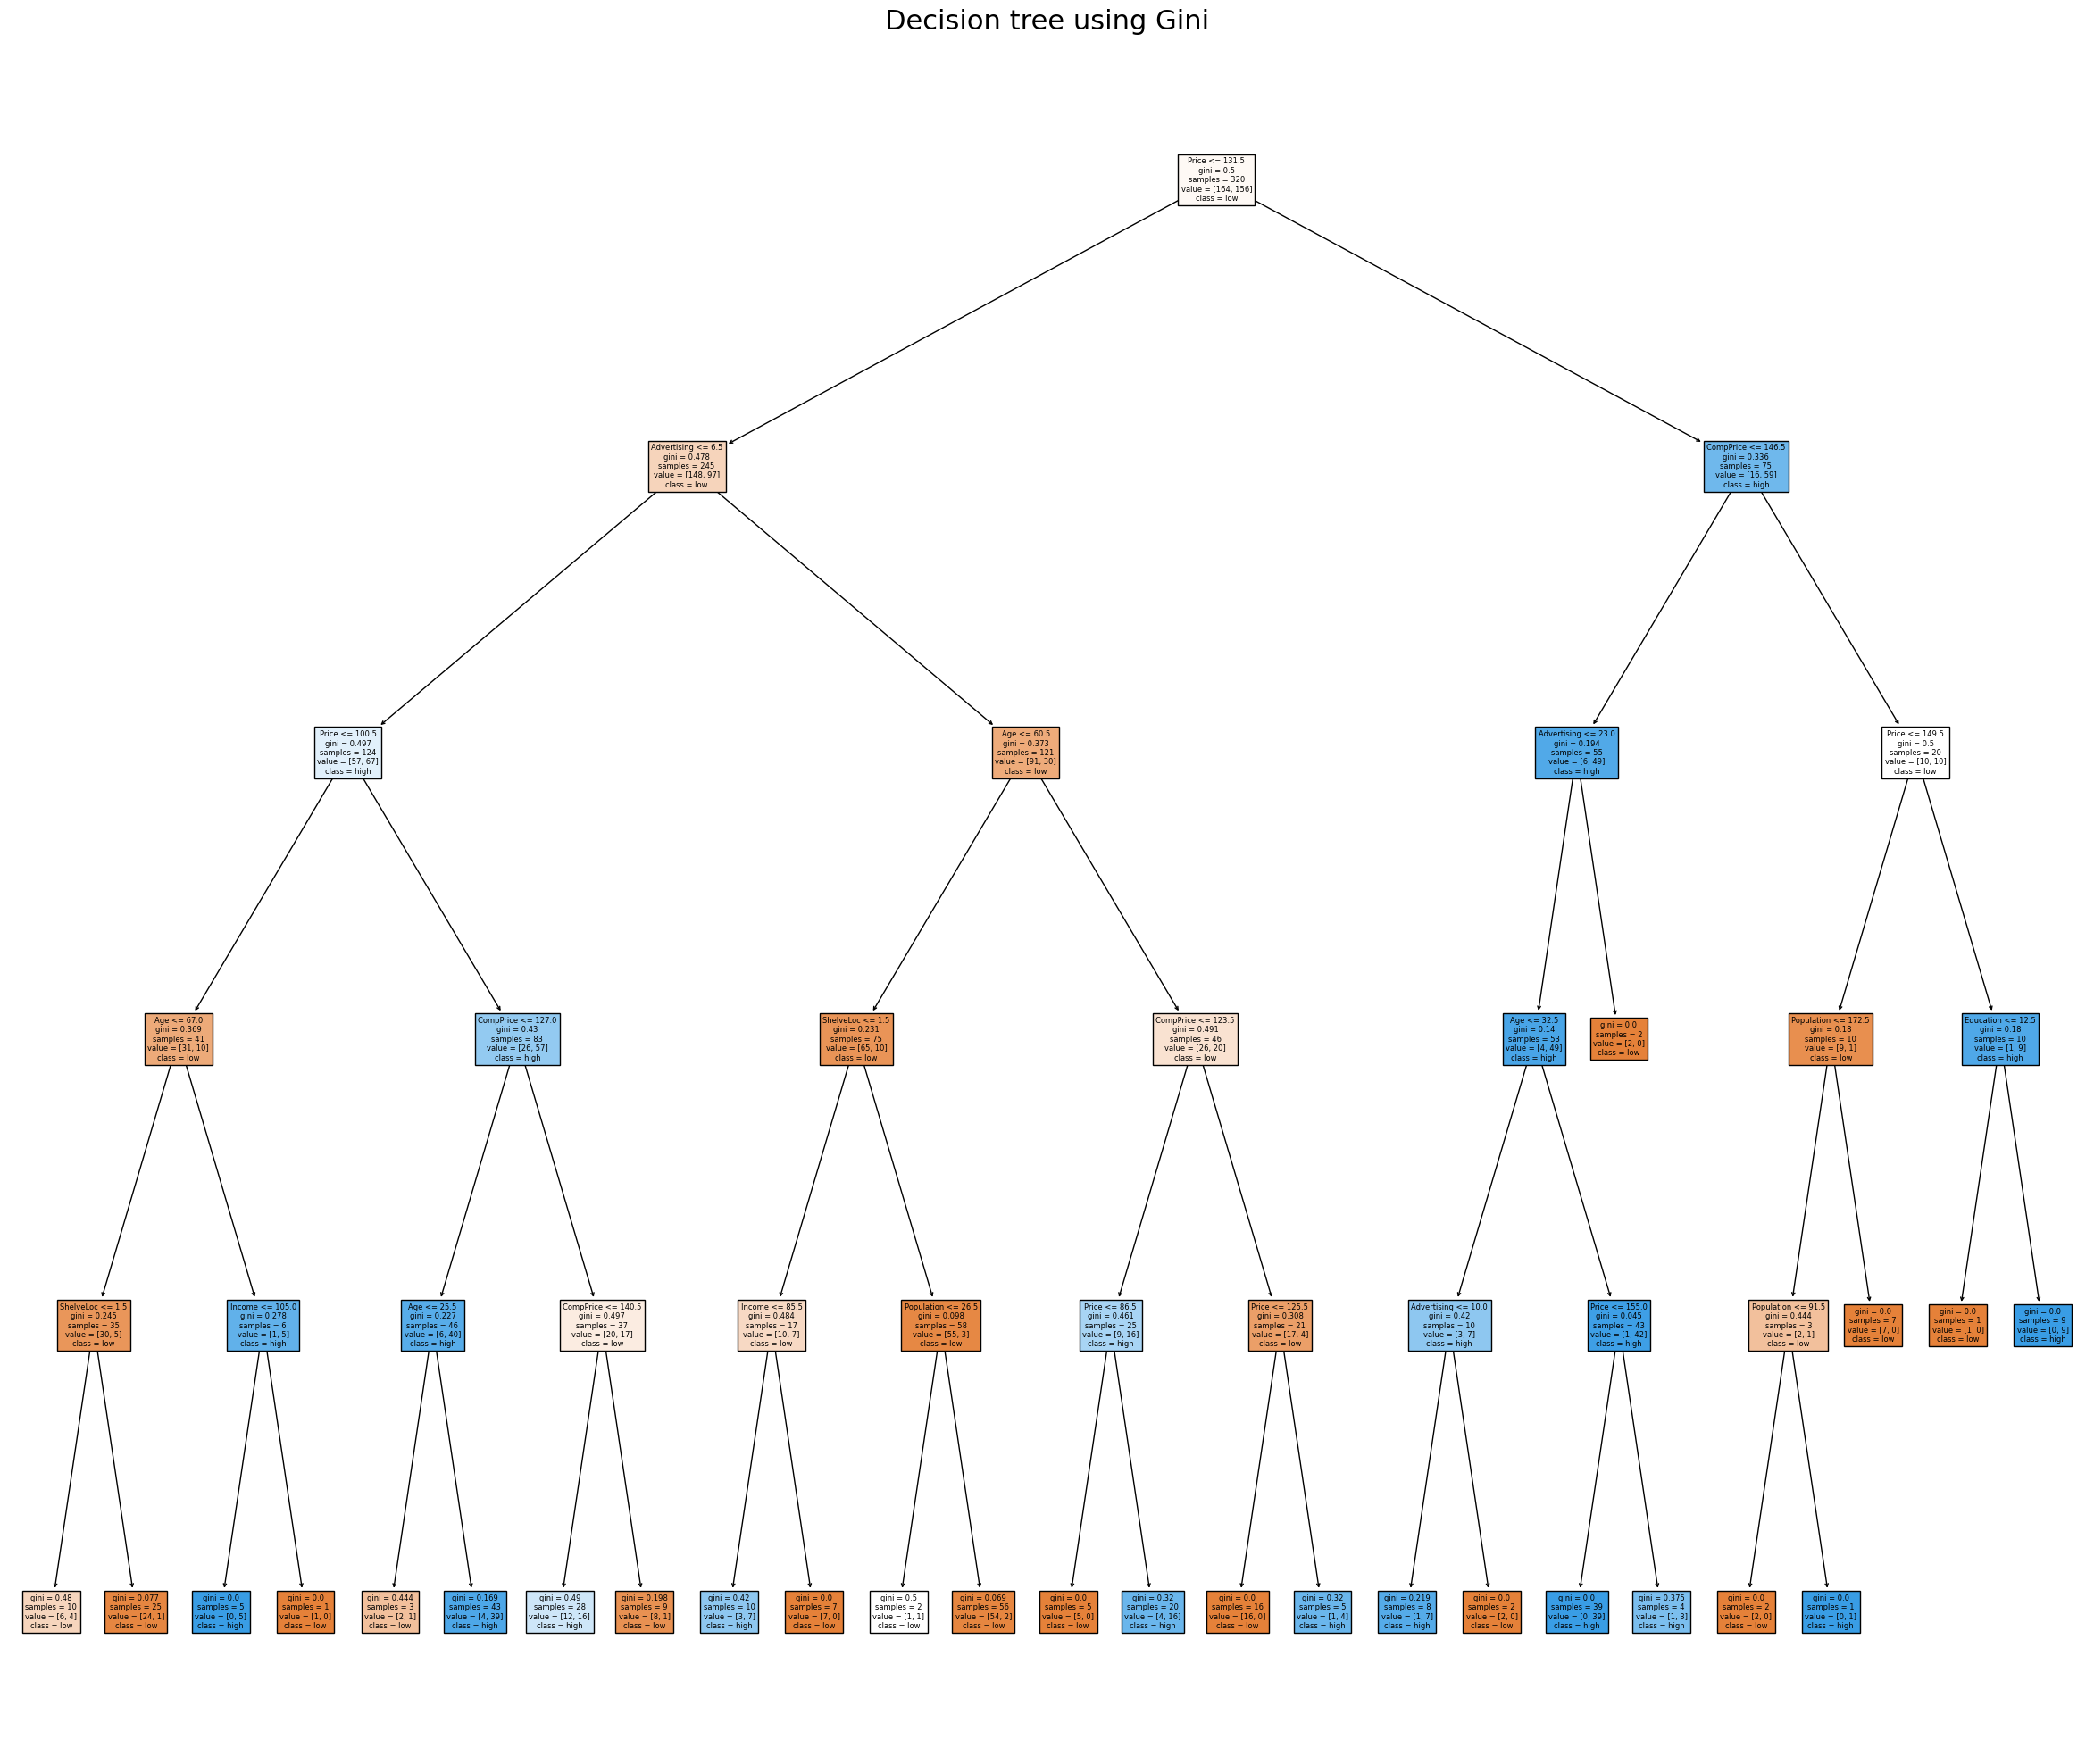

In [48]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

In [49]:
preds = model_gini3.predict(x_test)
pd.Series(preds).value_counts()

high    43
low     37
dtype: int64

In [50]:
preds

array(['low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'low', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'high'], dtype=object)

In [52]:
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,25,10
low,18,27


In [53]:
np.mean(preds==y_test)*100

65.0

Classification Report                precision    recall  f1-score   support

        high       0.58      0.71      0.64        35
         low       0.73      0.60      0.66        45

    accuracy                           0.65        80
   macro avg       0.66      0.66      0.65        80
weighted avg       0.66      0.65      0.65        80



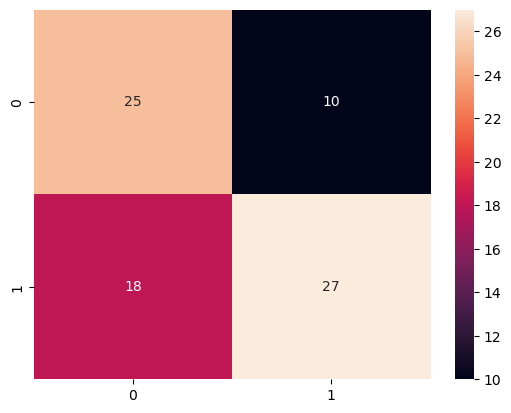

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d")
print('Classification Report ',classification_report(y_test,preds))

# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"